# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the playlist_df. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn how to clean and transform data, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset.

For this homework, you will use the provided file `Spotify_Playlist_Analysis.csv`.

Below, you can find all the set of features, provided in the dataset:


  1.   **Track Name:** The name of the track.
  
  2.   **Album Name:** The name of the album that the track belongs.

  3.   **Artist Name(s):** The name of the artists who released the track.

  4.   **Release Date:** The release date of the track.
  
  5.   **Duration (ms):** Numerical, the duration of the track in milliseconds.
  
  6.   **Popularity:** Numerical, the popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
  
  7.   **Genres:** The genres of the album that the track has.

  8.   **Danceability:** Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

  9.   **Energy** Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
  
  10.   **Key:** Numerical, the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1.
  
  11.   **Loudness:** Numerical, Overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
  
  12.   **Mode:** Numerical, mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
  
  13.   **Speechiness:**  Numerical, speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

  14.   **Acousticness:**  Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

  15.   **Instrumentalness** Numerical, predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
  
  16.   **Liveness:** Numerical, detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
  
  17.   **Valence:** Numerical, Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
  
  18.   **Tempo:**  Numerical, Overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1: Data Cleaning (15 points)

It is not possible to find a perfect dataset. During data collection, some values can be lost or some values can be duplicated. These lost values are called as missing values. In the DataFrame, missing values are usually labelled as `NaN`. Before starting to work on our dataset, it is very important to clean the dataset. For this, we need to look at how many missing values we have in the data set, how many duplicates there are.

In this question;
* First, print the shape (Number of rows and columns) of the dataset.
* Secondly, you should show info of the dataset (#,column, non_null count, Dtype of columns) , this will also help to understand if dataframe has any missing values.
* Lastly, you should check if dataframe has any duplicates, and you should drop the duplicates if any.

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
#3pts

#read the file.
#print number of the rows and columns. 
url = 'https://raw.githubusercontent.com/tansylu/cs210/main/Spotify_Playlist_Analysis.csv'
playlist_df = pd.read_csv(url)
print(playlist_df.shape)


(607, 18)


In [177]:
#2pts

#show the info of the playlist_df.  
print(playlist_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        607 non-null    object 
 1   Album Name        607 non-null    object 
 2   Artist Name(s)    607 non-null    object 
 3   Release Date      607 non-null    object 
 4   Duration (ms)     607 non-null    int64  
 5   Popularity        607 non-null    int64  
 6   Genres            603 non-null    object 
 7   Danceability      607 non-null    float64
 8   Energy            607 non-null    float64
 9   Key               607 non-null    int64  
 10  Loudness          607 non-null    float64
 11  Mode              607 non-null    int64  
 12  Speechiness       607 non-null    float64
 13  Acousticness      607 non-null    float64
 14  Instrumentalness  607 non-null    float64
 15  Liveness          607 non-null    float64
 16  Valence           607 non-null    float64
 1

When we control the result, number of non-null objects is equals to number of rows. This means there are no missing rows in our dataset, so don't need to do any operation here. Now let's filter the duplicate rows.

In [178]:
#5pts

#filter the duplicate rows and show the head. 
s = playlist_df[playlist_df.duplicated(subset=None, keep='first')]
s.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
540,Simple Man,(Pronounced 'Leh-'Nérd 'Skin-'Nérd) [Expanded ...,Lynyrd Skynyrd,1973,357933,0,"album rock,blues rock,classic rock,country roc...",0.461,0.734,1,-9.379,1,0.0374,0.000790,0.005540,0.2200,0.423,120.550
541,Battle Symphony,One More Light,Linkin Park,2017-05-19,216281,62,"alternative metal,nu metal,post-grunge,rap metal",0.653,0.839,10,-5.077,1,0.0685,0.036900,0.000000,0.0680,0.669,149.034
542,we fell in love in october,we fell in love in october / forget her,girl in red,2018-11-21,184153,32,"bedroom pop,indie pop,norwegian indie,pop",0.566,0.366,7,-12.808,1,0.0280,0.113000,0.181000,0.1550,0.237,129.959
543,Moaning Lisa Smile,My Love Is Cool (Deluxe Edition),Wolf Alice,2016-02-05,160747,48,"indie pop,indie rock,modern alternative rock,m...",0.470,0.806,2,-2.920,1,0.0505,0.000575,0.056400,0.0917,0.339,98.046
544,zombie girl,songs,Adrianne Lenker,2020-10-23,164224,48,"art pop,chamber pop,indie folk,indie pop,indie...",0.538,0.103,8,-19.380,1,0.0462,0.914000,0.000053,0.1370,0.383,128.424


As you see above, there are some duplicate rows in our dataset. The duplicate values can be an issue in our analysis, so it's important to get rid of them. In below cell, first drop the duplicates then print the shape and see if the shape at the start changed or not.

In [179]:
#5pts

#drop the duplicates.
#print number of the rows and columns after dropping duplicates.
playlist_df.drop_duplicates(inplace=True)
print(playlist_df.shape)

(594, 18)


Sometimes, you may fail to drop the duplicates. Double-check is important in these kind of cases therefore in the cell below, filter the duplicate rows again. If you see anything, then you did something wrong.

In [180]:
#filter the duplicate rows.
s = playlist_df[playlist_df.duplicated(subset=None, keep='first')]
s.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo


## Q2: Exploring the Dataset (40 points)

Since we complete the cleaning, we can finally start deep-diving into the dataset. First let's look at the 5 rows of our dataframe, and see the statistical summaries of columns with describe.

In [181]:
#2pts

#show the first 5 rows
playlist_df.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Crying Lightning,Humbug,Arctic Monkeys,2009-08-20,224826,67,"garage rock,modern rock,permanent wave,rock,sh...",0.498,0.885,4,-4.423,0,0.0461,0.0148,0.00041,0.239,0.670,106.719
1,Ode To The Mets,The New Abnormal,The Strokes,2020-04-10,351786,64,"alternative rock,garage rock,modern rock,perma...",0.426,0.617,1,-5.423,0,0.0289,0.3410,0.18100,0.101,0.201,92.002
2,Buzzcut Season,Pure Heroine,Lorde,2013-09-27,246755,68,"art pop,metropopolis,nz pop,pop",0.733,0.620,1,-10.525,1,0.0750,0.6060,0.30500,0.117,0.247,111.039
3,I Know The End,Punisher,Phoebe Bridgers,2020-06-18,344692,0,"indie pop,la indie",0.328,0.320,1,-10.282,1,0.0350,0.3240,0.01900,0.234,0.259,111.453
4,Simulation Swarm,Dragon New Warm Mountain I Believe In You,Big Thief,2022-02-11,252733,62,"art pop,brooklyn indie,indie pop,indie rock,sm...",0.703,0.578,1,-9.103,1,0.0728,0.4460,0.00240,0.102,0.670,105.204


In [182]:
#3pts

#show the statistical summary of columns.
playlist_df.describe()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,242163.707071,47.897306,0.532816,0.609467,5.469697,-8.024519,0.675084,0.049382,0.251596,0.109972,0.170078,0.439241,124.301288
std,67305.655426,23.347754,0.147752,0.210018,3.496554,3.201484,0.468738,0.040821,0.296811,0.221824,0.126547,0.228532,27.708996
min,96553.000000,0.000000,0.112000,0.052300,0.000000,-23.625000,0.000000,0.024300,0.000007,0.000000,0.042600,0.039400,65.740000
25%,199164.250000,38.000000,0.429000,0.447250,2.000000,-9.511500,0.000000,0.031050,0.013650,0.000053,0.097675,0.253500,104.981000
50%,231626.500000,53.000000,0.535500,0.630500,6.000000,-7.595000,1.000000,0.037600,0.111000,0.002225,0.118000,0.416000,123.166000
75%,275446.250000,64.000000,0.644000,0.788750,9.000000,-5.644500,1.000000,0.052300,0.410750,0.076550,0.205750,0.594000,141.366500
max,757440.000000,90.000000,0.888000,0.977000,11.000000,-0.734000,1.000000,0.464000,0.986000,0.954000,0.922000,0.979000,206.165000


Let's learn more about our dataset. There are various artists in playlists but some of them are more frequent than others. Find the most frequent 10 artists in the playlist.

In [183]:
#5pts

#show the most frequent 10 artists in the playlist.
playlist_df['Artist Name(s)'].value_counts().nlargest(10)

Arctic Monkeys     48
Lorde              21
Nilüfer Yanya      20
Wolf Alice         18
Phoebe Bridgers    13
The Strokes        13
Big Thief          12
Alvvays            12
alt-J              12
girl in red        12
Name: Artist Name(s), dtype: int64

If you completed the previous cell correctly, Arctic Monkeys should be the most frequent artist in the playlist. We also want to learn more about the genres in this playlist. The problem is most of the songs have more than one genre, so it's hard to use same method that you used above. Try to find a different approach, and show the most frequent genre in the playlist.

In [184]:
#10pts

#find the most frequent genre in the playlist.
g = playlist_df['Genres'].str.split(',',n=-1)
h = g.explode().value_counts()
genre = h.idxmax()

#print the most frequent genre name, and how many time it occurs.
print("The most common genre is " + genre+ " with " + str(h[0])+ ' times.')


The most common genre is rock with 235 times.


The most common genre is not surprising since Arctic Monkeys was at the top by far in our most frequent artist list. Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Danceability, Energy and Valence are good indicators for the emotion that conveyed by the track. Create a new column called "Positivity" in our dataframe by taking the mean of three columns (Danceability, Energy, Valence) and show the statistical properties with describe again.

In [185]:
#5pts

#create a new column
f = playlist_df[['Danceability','Energy','Valence']].mean(axis='columns')
playlist_df['Positivity']=f
playlist_df.describe()
#show the statistical properties


,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Positivity
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,242163.707071,47.897306,0.532816,0.609467,5.469697,-8.024519,0.675084,0.049382,0.251596,0.109972,0.170078,0.439241,124.301288,0.527175
std,67305.655426,23.347754,0.147752,0.210018,3.496554,3.201484,0.468738,0.040821,0.296811,0.221824,0.126547,0.228532,27.708996,0.141960
min,96553.000000,0.000000,0.112000,0.052300,0.000000,-23.625000,0.000000,0.024300,0.000007,0.000000,0.042600,0.039400,65.740000,0.164767
25%,199164.250000,38.000000,0.429000,0.447250,2.000000,-9.511500,0.000000,0.031050,0.013650,0.000053,0.097675,0.253500,104.981000,0.423750
50%,231626.500000,53.000000,0.535500,0.630500,6.000000,-7.595000,1.000000,0.037600,0.111000,0.002225,0.118000,0.416000,123.166000,0.538667
75%,275446.250000,64.000000,0.644000,0.788750,9.000000,-5.644500,1.000000,0.052300,0.410750,0.076550,0.205750,0.594000,141.366500,0.622333
max,757440.000000,90.000000,0.888000,0.977000,11.000000,-0.734000,1.000000,0.464000,0.986000,0.954000,0.922000,0.979000,206.165000,0.892667


We are in a good shape now. Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset.  In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [186]:
#3pts
d = playlist_df.set_index("Track Name")
d.loc["Crying Lightning"]
#filter the crying lightning

Album Name                                                     Humbug
Artist Name(s)                                         Arctic Monkeys
Release Date                                               2009-08-20
Duration (ms)                                                  224826
Popularity                                                         67
Genres              garage rock,modern rock,permanent wave,rock,sh...
Danceability                                                    0.498
Energy                                                          0.885
Key                                                                 4
Loudness                                                       -4.423
Mode                                                                0
Speechiness                                                    0.0461
Acousticness                                                   0.0148
Instrumentalness                                              0.00041
Liveness            

After we filtered Crying Lightning, let's learn more about some columns of the dataset. In this question, create a new dataframe called "energetic_df" by sorting the energy column of "playlist_df". Sorting must be descending. Then show the most energetic three songs in the playlist with their information.

In [187]:
#6pts
energetic_df = playlist_df.set_index("Energy")
energetic_df = energetic_df.sort_index(ascending=False)
#create energetic df
print("The most energetic three songs in the playlist is:")
energetic_df.head(3)
#your code

The most energetic three songs in the playlist is:


,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Positivity
Energy,,,,,,,,,,,,,,,,,,
0.977,Sugar/Tzu,Hellfire,black midi,2022-07-15,230687,48,"crank wave,indie rock,noise rock,uk noise rock...",0.275,0,-4.418,1,0.378,0.105000,0.000011,0.4720,0.101,87.678,0.451000
0.974,Brianstorm,Favourite Worst Nightmare,Arctic Monkeys,2007-04-22,172866,68,"garage rock,modern rock,permanent wave,rock,sh...",0.420,1,-4.706,1,0.191,0.000082,0.001550,0.0871,0.463,165.182,0.619000
0.970,By the Way,By the Way (Deluxe Edition),Red Hot Chili Peppers,2002-07-09,216933,72,"alternative rock,funk metal,funk rock,permanen...",0.451,0,-4.938,1,0.107,0.026400,0.003550,0.1020,0.198,122.444,0.539667


Let's apply the same method to an another column. In this question, create a new dataframe called "positivity_df" by sorting the positivity column of "playlist_df". Sorting must be descending. Then show the most positive three songs in the playlist with their information.

In [188]:
#6pts
positivity_df = playlist_df.set_index("Positivity")
positivity_df  = positivity_df .sort_index(ascending=False)

#create positivity df
print("The most positive three songs in the playlist is:")
positivity_df.head(3)
#your code

The most positive three songs in the playlist is:


,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Positivity,,,,,,,,,,,,,,,,,,
0.892667,chase me,PAINLESS,Nilüfer Yanya,2022-03-04,210373,31,"art pop,indie rock,uk alternative pop",0.867,0.832,11,-8.383,0,0.0453,0.113,0.000000,0.0745,0.979,119.993
0.868333,Ocean Man,The SpongeBob SquarePants Movie-Music From The...,Ween,2004-11-09,126946,38,alternative rock,0.720,0.912,4,-6.130,1,0.0363,0.551,0.001220,0.0982,0.973,122.782
0.861333,Got My Mind Set On You - Remastered 2004,Cloud Nine,George Harrison,1987-11-02,234653,63,"album rock,beatlesque,classic rock,folk rock,m...",0.767,0.854,4,-6.947,1,0.0426,0.465,0.000002,0.4850,0.963,149.206


## Q3: Visualization and Analysis (45 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a histogram for Danceability, with bin size 15.
- Set title as 'Danceability'
- Set label for y as 'Frequencies'
- Set label for x as 'Danceability'
- Set boundaries for y axis as 0 to 100.
- Set boundaries for x axis as 0 to 1.
- After visualization, show the statistical properties of Danceability with describe.

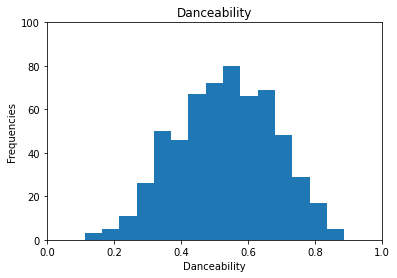

In [189]:
 # create a histogram with the information above (3pts)
hist = playlist_df["Danceability"].plot.hist(bins=15, ylim=(0,100), xlim=(0,1))
hist.set_title("Danceability")
hist.set_xlabel("Danceability")
hist.set_ylabel("Frequencies")

plt.show()

In [190]:
#show the statistical properties (2pts)
playlist_df["Danceability"].describe()

count    594.000000
mean       0.532816
std        0.147752
min        0.112000
25%        0.429000
50%        0.535500
75%        0.644000
max        0.888000
Name: Danceability, dtype: float64

If we analyze the results, we see that the distribution of the 'Danceability' of the tracks in our data set is close to normal distribution. The mean is 0.532816 with a standard deviation 0.147752. The danceability level vary from 0.112000 to 0.888000 (both inclusive). The median is 0.535500.

For the second question:

- Create a histogram for Valence, with bin size 15.
- Set title as 'Valence Level'
- Set label for y as 'Frequencies'
- Set label for x as 'Valence'
- Set boundaries for y axis as 0 to 100.
- Set boundaries for x axis as 0 to 1.
- After visualization, show the statistical properties of Valence with describe.


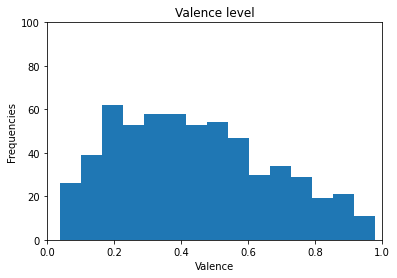

In [191]:
# create a histogram with the information above (3pts)
hist = playlist_df["Valence"].plot.hist(bins=15, ylim=(0,100), xlim=(0,1))
hist.set_title("Valence level")
hist.set_xlabel("Valence")
hist.set_ylabel("Frequencies")

plt.show()

In [192]:
#show the statistical properties (2pts)
playlist_df["Valence"].describe()

count    594.000000
mean       0.439241
std        0.228532
min        0.039400
25%        0.253500
50%        0.416000
75%        0.594000
max        0.979000
Name: Valence, dtype: float64

If we analyze the results, we see that the distribution of the 'Valence' of the tracks in our data set is right-skewed. The mean is 0.439241 with a standard deviation 0.0.228532. The valence level vary from 0.039400 to 0.979000 (both inclusive). The median is 0.416000.

Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, which plot would be the appropriate choice?

*Question*: Which plot would be the appropriate choice?

*Answer* : Scatter plot to show the bivariate relationship and visually note any correlation
 **(3pts)**

Then;

- Create the plot you chose for Energy and Loudness.
- Set title as 'Loudness vs. Energy'
- Set label for y as 'Loudness (dB)'
- Set label for x as 'Energy'
- Set boundaries for y axis as -25 to 0.
- Set boundaries for x axis as 0 to 1.



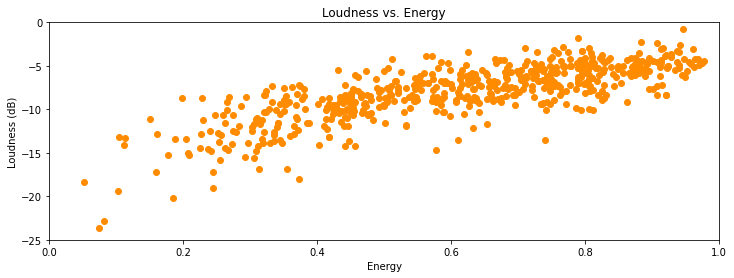

In [193]:
 # create the plot (7pts)
plt.figure(figsize=(12, 4))
plt.scatter('Energy','Loudness',  data=playlist_df,  color='darkorange')
plt.title('Loudness vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.xlim([0, 1])
plt.ylim([-25, 0])
plt.show()

#### Question : Interpretation of the graph above (5pts)

What can we understand from the graph above? Shortly write your comments about the graph. You can edit this cell.

Loudness of the song is strongly correlated with its energetic level.

Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

**Objectives**

- Create a new column called `Emotion` that contains positivity information in groups as string. 
- The emotions will be: Sad (if positivity value is smaller or equal than 0.45), Neutral (if positivity value is between 0.45 and 0.57 (inclusive)), and Happy (if positivity value is bigger than 0.57)
- Then create the new dataframe called 'new_artist_df'.
- Filter the songs of 'Phoebe Bridgers', 'The Strokes', 'alt-J' and 'girl in red'.
- Sort 'new_artist_df' by positivity in ascending order.
- Show the first 5 rows.




In [194]:
#10pts - tasks above

#your code
playlist_df=playlist_df.set_index("Artist Name(s)")
playlist_df['Emotion'] = np.where(playlist_df['Positivity'] > 0.57, 'Happy',np.where(playlist_df['Positivity'] > 0.45,'Neutral', 'Sad'))
new_artist_df = playlist_df.loc[["Phoebe Bridgers", "The Strokes", "alt-J", "girl in red"]]
new_artist_df = new_artist_df.sort_values('Positivity')
new_artist_df.head(5)

,Track Name,Album Name,Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Positivity,Emotion
Artist Name(s),,,,,,,,,,,,,,,,,,,
Phoebe Bridgers,Smoke Signals,Stranger in the Alps,2017-09-22,324773,61,"indie pop,la indie",0.265,0.237,10,-14.599,1,0.0351,0.945,0.000267,0.1120,0.190,87.912,0.230667,Sad
Phoebe Bridgers,Funeral,Stranger in the Alps,2017-09-22,232373,65,"indie pop,la indie",0.218,0.263,11,-14.416,1,0.0376,0.947,0.000280,0.0919,0.307,170.724,0.262667,Sad
Phoebe Bridgers,Moon Song,Punisher,2020-06-18,277676,0,"indie pop,la indie",0.380,0.240,1,-12.544,1,0.0514,0.871,0.002870,0.1070,0.172,103.818,0.264000,Sad
Phoebe Bridgers,Punisher,Punisher,2020-06-18,189622,0,"indie pop,la indie",0.428,0.226,1,-12.820,1,0.0409,0.986,0.000402,0.1080,0.212,129.163,0.288667,Sad
Phoebe Bridgers,I Know The End,Punisher,2020-06-18,344692,70,"indie pop,la indie",0.323,0.323,1,-10.268,1,0.0351,0.330,0.022900,0.2330,0.256,111.826,0.300667,Sad


Now it's time to create a visualization:

- Plot the frequencies of each emotion by the artist. Use 'new_artist_df' as the data source.
- Set the figure size as (8,6)
- Set title as 'Artists' Emotional State'
- Set x-tick label as 'Sad', 'Neutral' and 'Happy'.
- Set y axis boundaries as (0,10)
- Set x label as 'Emotions'.
- Set y label as 'Frequencies'.
- Set legend as ['Phoebe Bridgers', 'girl in red', 'alt-J', 'The Strokes']. Title should be artists.

The result should be same as the figure below. (Colors may change, ignore them.)

<img src="https://i.hizliresim.com/2sjj3hd.jpg" alt="barplot-210" border="0" width="500">

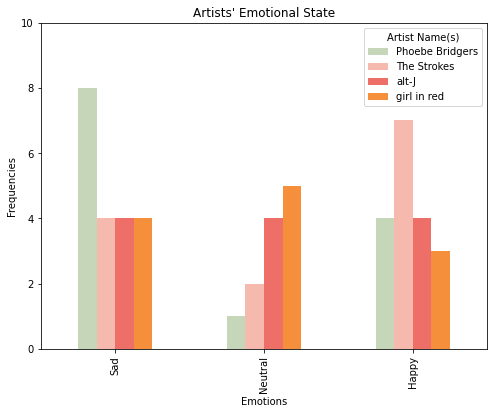

In [195]:
# 10pts - tasks above
#your code
# create a histogram with the information above (3pts)
from cycler import cycler
grouped = new_artist_df.groupby(['Emotion','Artist Name(s)']).size()
grouped = grouped.unstack()
my_colors = ["#c6d7b9","#f6b9ad","#ee6f68","#f68f3c"]

grouped.sort_values('Emotion', ascending=False).plot(kind='bar', figsize=(8, 6), color=my_colors)
plt.title( "Artists' Emotional State")
plt.xlabel("Emotions")
plt.ylabel("Frequencies")
plt.ylim([0, 10])
plt.show()


Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify playlist_df. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/5TPzjEydJcgbNj7xLwKQVG?si=669fdd7512c44d96

See you later!
    
<img src="https://i.imgur.com/KAoQCQg.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

